# NYC AIRBNB EDA ANALYSIS

In [30]:
import pandas as pd

In [47]:
df = pd.read_csv("sample_data/AB_NYC_2019.csv")
print(df.head())
print(df.shape)
print(df.info())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

Originally it has NULL values in Name, Host Name, Last Review and Last month reviews, but after cleaning data we removed name and host name as they are not useful for analysis and filled last month reviews with 0 and last review with "No review".


In [48]:
df = df[(df['price'] > 0) & (df['price'] < 1000)]

In [49]:
df.shape

(48586, 16)

In [50]:
print(df.isnull().sum())

id                                   0
name                                16
host_id                              0
host_name                           21
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       9890
reviews_per_month                 9890
calculated_host_listings_count       0
availability_365                     0
dtype: int64


In [51]:
df.drop(['name', 'host_name'], axis = 1, inplace = True)
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['last_review'] = df['last_review'].fillna("No review")

In [52]:
df.shape

(48586, 14)

In [53]:
print(df['price'].describe())

count    48586.000000
mean       140.269049
std        112.899316
min         10.000000
25%         69.000000
50%        105.000000
75%        175.000000
max        999.000000
Name: price, dtype: float64


In [54]:
df = df[(df['price'] > 0) & (df['price'] <= 1000)]
df = df[df['minimum_nights'] <= 369]

With the above code, we filters the unusual rates like \$0 and above \$1000 and also we filters the minimum_nights should be less than 369 because we have only 369 days in a year 💁


In [55]:
df.shape

(48573, 14)

In [56]:
print(df.isnull().sum())

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


Cleaned the dataset by:

Removing rows with missing or irrelevant data (e.g., host names, zero price)

Capping outliers for price and minimum nights

Replacing missing values with reasonable defaults

This clears we have zero missing values now

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

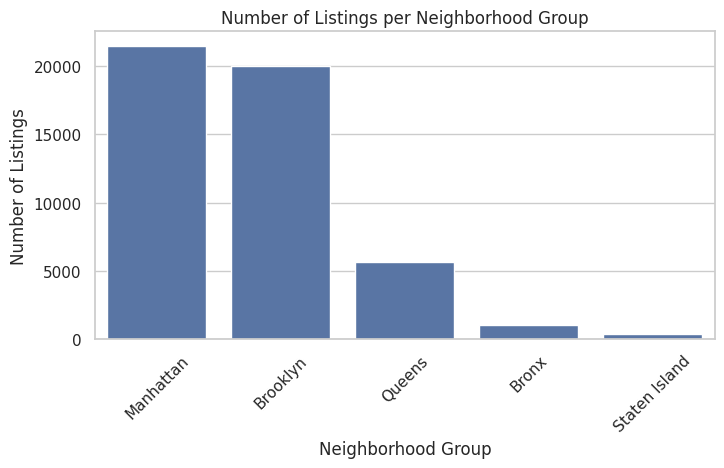

In [60]:
plt.figure(figsize = (8, 4))
sns.countplot(data = df, x = 'neighbourhood_group', order = df['neighbourhood_group'].value_counts().index)
plt.title("Number of Listings per Neighborhood Group")
plt.xlabel("Neighborhood Group")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.show()

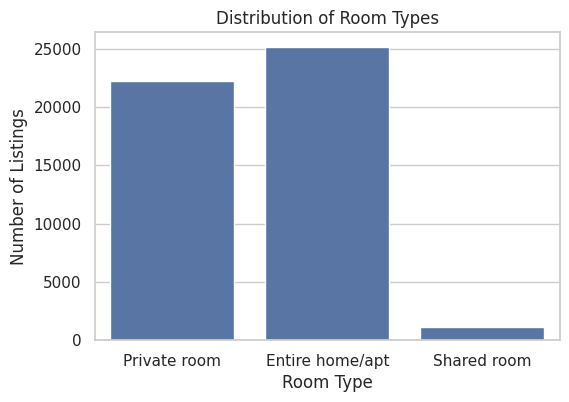

In [62]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='room_type')
plt.title("Distribution of Room Types")
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.show()


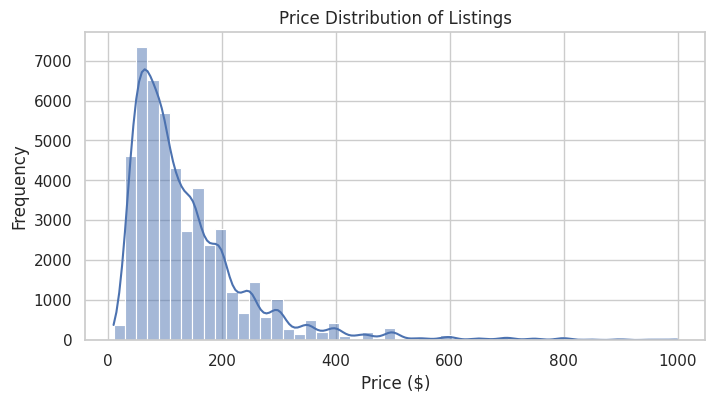

In [64]:
plt.figure(figsize=(8, 4))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution of Listings")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()


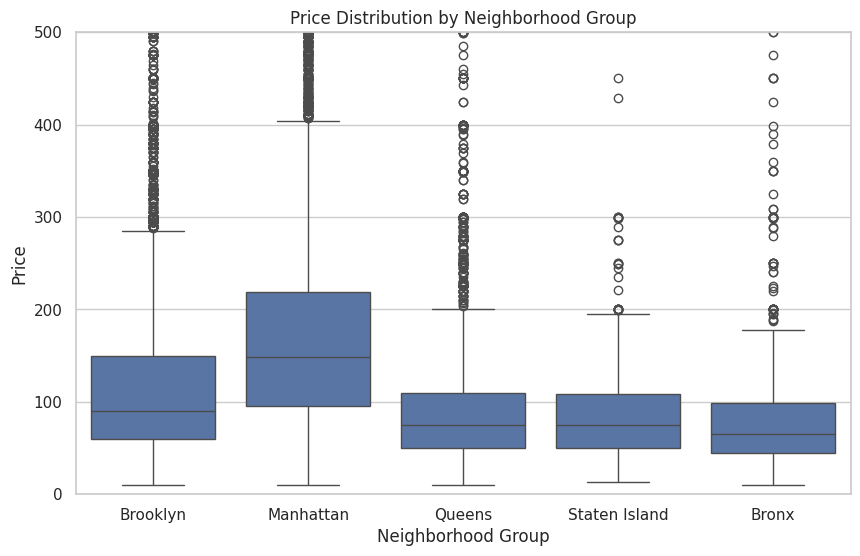

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='neighbourhood_group', y='price')
plt.ylim(0, 500)
plt.title("Price Distribution by Neighborhood Group")
plt.xlabel("Neighborhood Group")
plt.ylabel("Price")
plt.show()


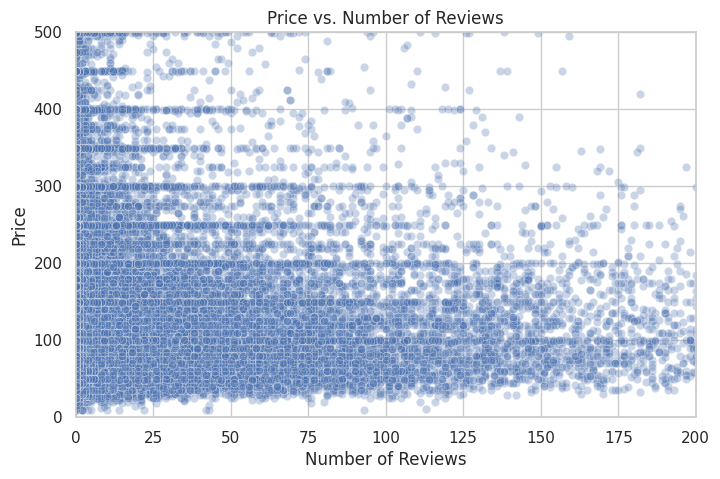

In [66]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='number_of_reviews', y='price', alpha=0.3)
plt.xlim(0, 200)
plt.ylim(0, 500)
plt.title("Price vs. Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.show()


 1. Manhattan dominates the listings, followed by Brooklyn. Together, they account for the majority of Airbnb stays in NYC.


2.  Manhattan listings have the highest median price, indicating a premium market, especially in areas like Midtown and Lower Manhattan.


3. Entire home/apartment is the most common room type, suggesting that tourists prefer private accommodations over shared spaces.

4. Most listings fall within the $50–$200 range, with a small number of extreme outliers up to $1000 (filtered to reduce skew).

5. Listings priced very high (> $500) tend to have fewer reviews, possibly indicating lower booking frequency or niche demand.

6. Bronx and Staten Island have the lowest number of listings and cheapest prices, potentially representing untapped or lower-demand markets.

7. There is no strong positive correlation between number of reviews and price, but moderately priced listings (~$100–$200) seem to get more reviews.
